# Part I - ProsperLoanData Exploration Analysis
## by Olalekan Akinpelu

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling.

In [1]:
# import all packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%config InlineBbackend.figure_format='retina'

In [3]:
# loading dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# A tuple of array dimensions that tells the number of rows and columns of Prosper Loan Data Exploration DataFrame
df.shape

(113937, 81)

In [5]:
# Printing a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


What is the structure of your dataset?
There are 113,937 rows in the dataset containing different loans collected by prosper and 81 columns containing the features of each loan collected such as Listing number, Term, Borrower API etc.

The dataset features can be split into two or more categories:

1.Borrower information. 2.Loan performance information. 3.Lender information.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?
What is/are the main feature(s) of interest in your dataset?
The main features of interest in this data set would include the borrower features which are used in tracking the performance of the loan. This includes:

1.LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.The PastDue status will be accompanied by a delinquency bucket.

2.LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

3.Estimated Effective Yield:Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate,(ii) minus estimated uncollected interest on charge-offs,(iii) plus estimated collected late fees. Applicable for loans originated after July 2009.

4.EstimatedLoss: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

5.EstimatedReturn: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

6.ProsperRating (numeric): The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.

7.ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

8.ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.

9.DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

10.IncomeRange: The income range of the borrower at the time the listing was created. 11.CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

Though there are many features to explore, I suspect the following borrower features will have the largest effect on the performance of the loan:
1.IncomeRange - The income range of the borrower at the time the listing was created.

2.DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

3.CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

4.ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

5.ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.

Thus, my primary variable is LoanStatus. I will be analyzing the impact of these other variables listed above on the LoanStatus.

# Univariate Exploration 1.

# Estimated Return
We should start by looking deeper into our feature of intrests. We will begin with the estimated returns.

In [9]:
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

There exists in the estimated return rows about 23,000 null rows

The range of estimated returns is between (-18% to 28%.)

Let's drop the null rows and proceed with a histogram plot.

### We can also solve the univariate exploration analysis by using Summary statistics, Creating a frequency table and Charts

In [10]:
df['EstimatedReturn'].mean()

0.09606829611209916

In [11]:
df['EstimatedReturn'].median()

0.0917

In [12]:
df['EstimatedReturn'].std()

0.030403107457360225

The distribution of the data is Right skewed, because the mean is greater than median in the summary statistics. This implies that this is not a normal distribution.

In [13]:
#create frequency table for 'Estimated return'
df['EstimatedReturn'].value_counts()

0.1246    2217
0.1487    1097
0.0691     760
0.1414     738
0.1074     654
          ... 
0.1687       1
0.1734       1
0.0946       1
0.0867       1
0.1847       1
Name: EstimatedReturn, Length: 1476, dtype: int64

Estimated return of 0.1246 units was assigned to the highest number of loans and that was the the highest estimated return, the lowest estimated return was -0.0636 and that appeared only once. There might have been a lot of reason for a low estimated return, it can be due to Inflation, Prosper loan capital structure etc.


In [14]:
#Remember there were null rows in the estimated return rows? Now let's drop them
# drop null rows without an estimated return
df.EstimatedReturn.dropna(axis = 0, inplace = True)

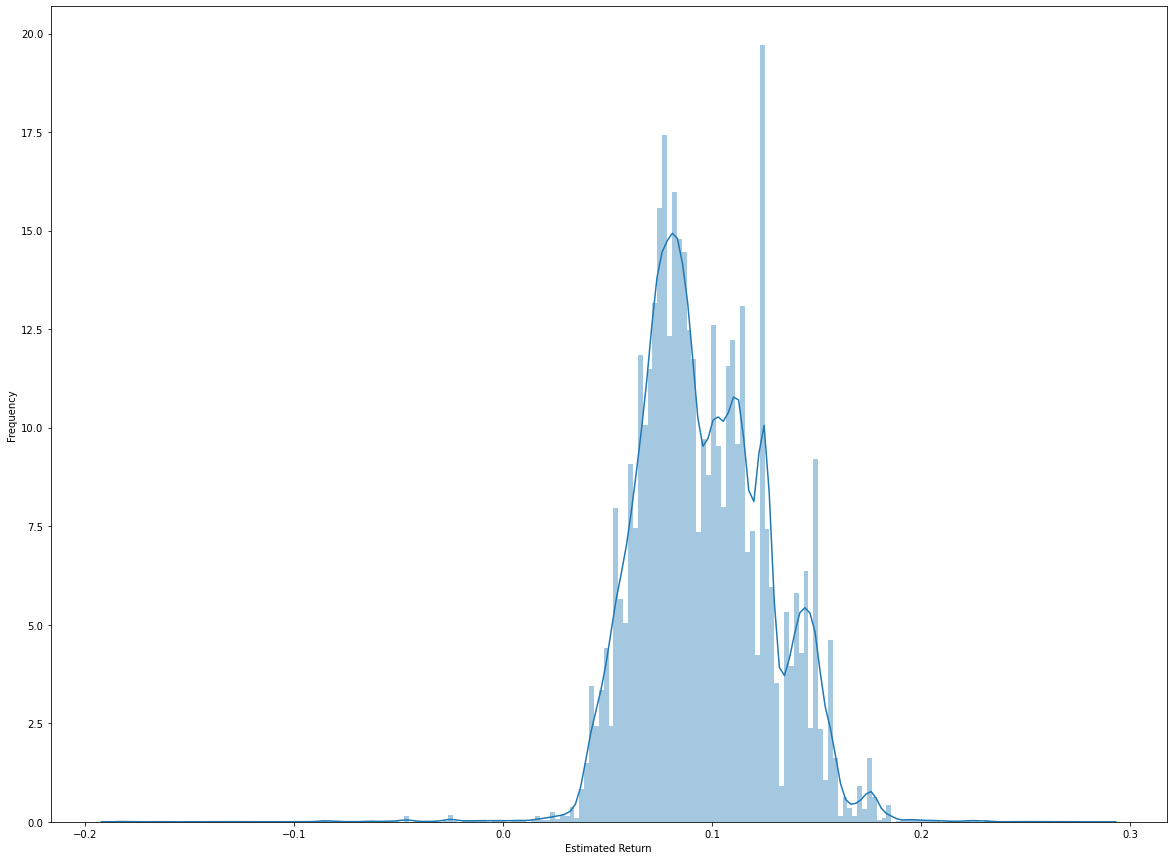

In [15]:
#Now let's create a Histogram plot for Estimated returns.
# histogram plot
plt.figure(figsize = [20,15])
sb.distplot(df.EstimatedReturn, kde = True, bins = 200)
plt.xlabel('Estimated Return')
plt.ylabel('Frequency');

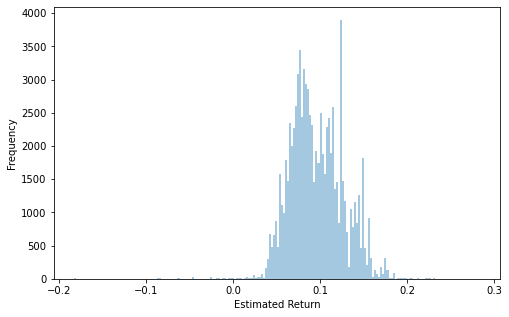

In [16]:
# histogram plot with KDE being false and reducing the plotting size.
plt.figure(figsize = [8,5])
sb.distplot(df.EstimatedReturn, kde = False, bins = 200)
plt.xlabel('Estimated Return')
plt.ylabel('Frequency');

As we have seen in the summary statisitics, the mean is greater than median, therefore the distribution is right-skewed as expected.This is in relation to the KDE which is true.

Next in the univariate analysis is the analysis of actual return.

# Univariate Exploration 2
## Actual Returns

In [17]:
# Calculate the Formula for Actual Returns, then compare with estimated returns, in order to know if Prosper Loan made profit or lose.
df['ActualReturns'] = df.LP_CustomerPayments - df.LoanOriginalAmount - (df.LP_ServiceFees + df.LP_CollectionFees + df.LP_NetPrincipalLoss)
df['ActualReturns'] = 1 + (df.ActualReturns / df.LoanOriginalAmount)

In [18]:
df.ActualReturns.describe()

count    113937.000000
mean          0.531620
std           0.621164
min          -1.000650
25%           0.074989
50%           0.415864
75%           1.119834
max           2.602880
Name: ActualReturns, dtype: float64

In [19]:
df['ActualReturns'].mean()

0.5316203664711544

In [20]:
df['ActualReturns'].median()

0.415864

In [21]:
df['ActualReturns'].std()

0.6211641358649481

The mean of actual returns is greater than the median, indicating that the distribution is right skewed. Meaning most of the outliers in the data appeared towards the right side of the data.

In [22]:
df['ActualReturns'].value_counts()

 0.000000    5748
-1.000000     423
 0.750245      82
 0.084955      61
 0.794233      52
             ... 
-0.454789       1
-0.861951       1
 0.071610       1
 1.535627       1
 1.423841       1
Name: ActualReturns, Length: 88352, dtype: int64

According to the frequency table shown above, there are several rows in which the Actual return returned a negative number, this implies that Prosper Loan exploration company were at a loss, since they pegged their estimated return at 0.1246, any values lower than their estimated return is a Loss and anything higher than that is a Gain.

Questions From the ActualReturns Analysis;
What caused the Actual Returns to be less than the Estimated returns? Probably Inflation, Loan status; What was the borrowers loan status, was it dafaulted, completed,charged off, etc. Also what was the debt to income ratio, was it indicative of a high borrowning risk or a low borrowing risk. All these might have affected the annual returns and returned a negative annual returns also.

Next on the analysis is to analyze the correlation between the Loan status and the Actual returns.

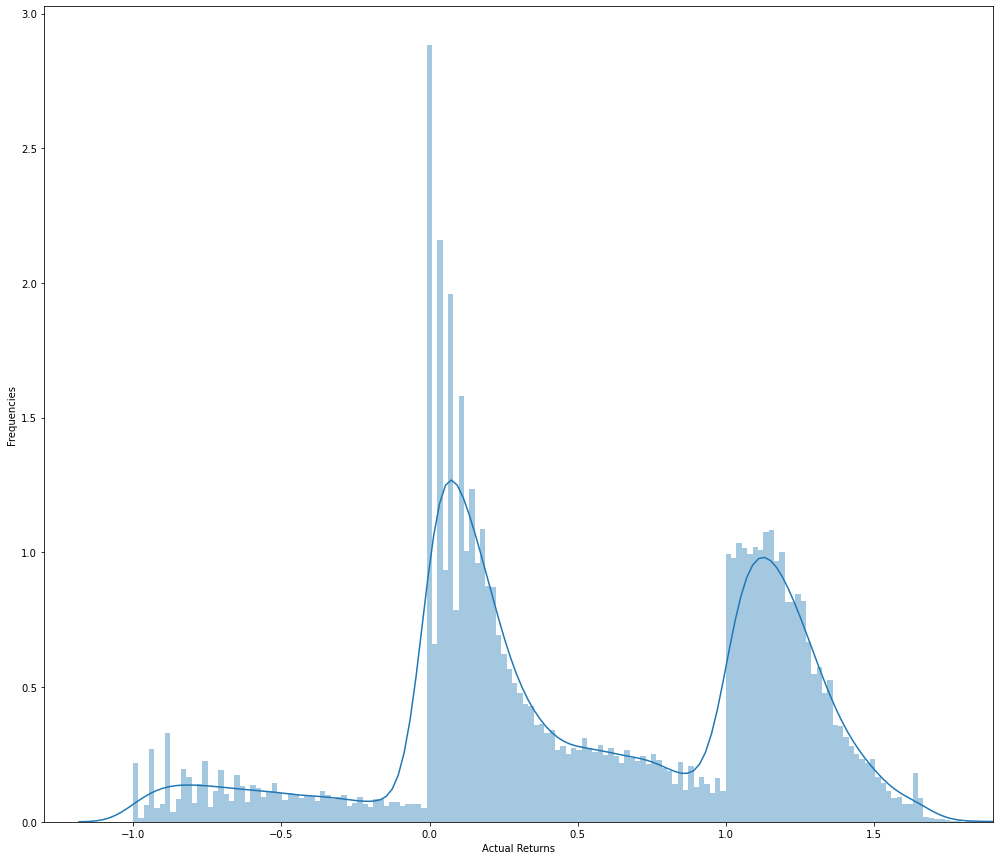

In [23]:
#Now let's create a histogram for Actual returns.
# plot distribution
plt.figure(figsize = [17,15])
sb.distplot(df.ActualReturns, kde = True, bins = 200)
plt.xlim(-1.3, 1.9)
plt.xlabel('Actual Returns')
plt.ylabel('Frequencies');

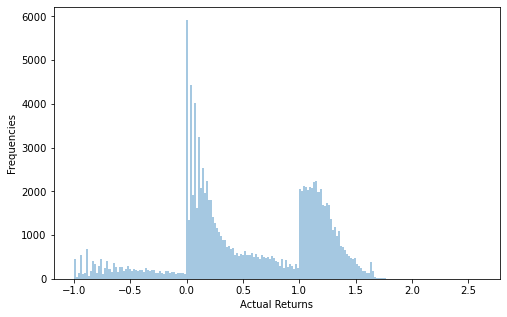

In [24]:
plt.figure(figsize = [8,5])
sb.distplot(df.ActualReturns, kde = False, bins = 200)
plt.xlabel('Actual Returns')
plt.ylabel('Frequencies');

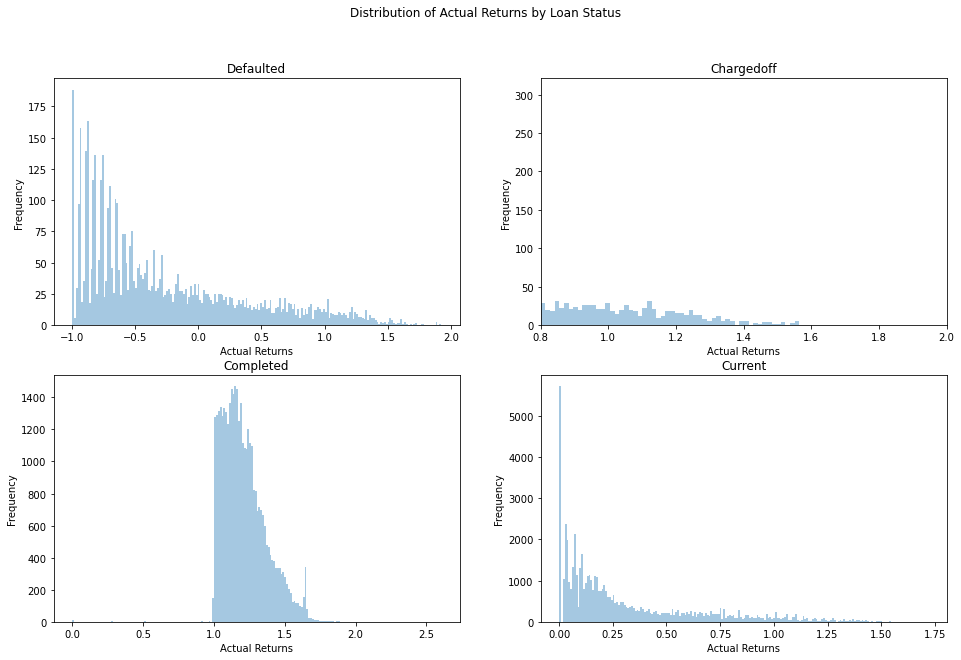

In [25]:
# multiplot for loan status

variables = ['Defaulted', 'Chargedoff', 'Completed', 'Current']

plt.figure(figsize = [16, 10])

# loop through variables list
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sb.distplot(df.query('LoanStatus == "{}"'.format(variables[i])).ActualReturns, 
                 kde = False, bins = 200)
    
    plt.xlabel('Actual Returns')
    plt.ylabel('Frequency')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(0.8, 2.0)

plt.suptitle('Distribution of Actual Returns by Loan Status');

We asked a question above on the correlation of actual returns with loan status. Is a negative actual return related to a subset of the loan status? Seems so, those with defaulted loan status returned a lower than expected profit rate for Prosper Loan Data company. Those with completed loans had the highest actual returns, those with chargedoff also had a fair actual return value.

The next step in the analysis is to figure out why the defaulted loan status had the highest negative actual return value. Does the loan status correlates with the income range of the borrower and will this affect the proper credit grading? Hypothetically I suppose so i.e (There should be a direct relationship between loan status and income range and an indirect relationship between income range and prosper credit grading, also there should be a direct relationship between loan status and prosper credit grading system.

Let's further analyze the data to find out.

# Prosper Credit Rating.

In [26]:
df['ProsperRating (Alpha)'].describe() 

count     84853
unique        7
top           C
freq      18345
Name: ProsperRating (Alpha), dtype: object

In [27]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

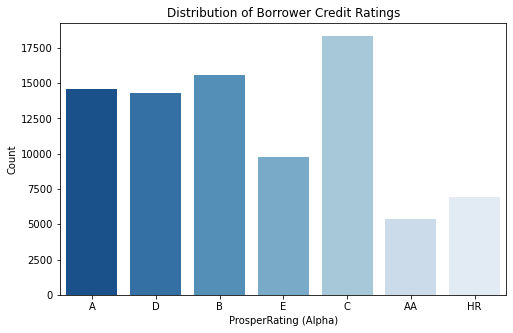

In [28]:
plt.figure(figsize = [8, 5])
sb.countplot(data = df, x = 'ProsperRating (Alpha)', palette = "Blues_r")
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');

The prosperRating(Alpha) is skewed just as the way the Estimated return is also right skewed, implying that that prosper rating (Alpha) which was gotten using the borrowers credit socre was also used to compute and calculate the estimate return, which later turned out to be true becuase I assume there's a similarity between the prosper credit grading and the credit grade. Also we can see that the Prosper Rating(Alpha) E is also Left skewed whcih is in line with the Defaulted loan status meaning that there is a postive relationship between prosper credit ratings and loan status.

Let's check on the Income Range.

# Income Range.

In [30]:
df.IncomeRange.describe()

count             113937
unique                 8
top       $25,000-49,999
freq               32192
Name: IncomeRange, dtype: object

In [31]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

To simplify our visualization, let's combine the "Not employed", "Not displayed", and "$0" categories together.

In [32]:
df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [33]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)

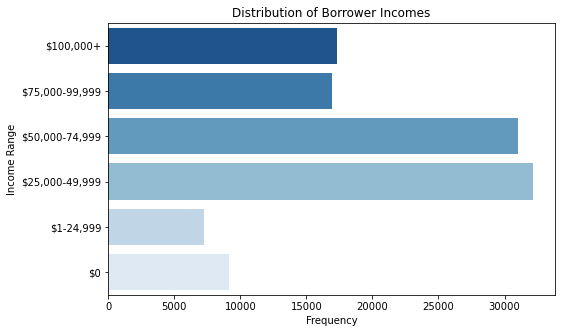

In [34]:
# bar chart..
plt.figure(figsize = [8, 5])
sb.countplot(data = df, y = 'IncomeRange', palette = "Blues_r")
plt.ylabel('Income Range')
plt.xlabel('Frequency')
plt.title('Distribution of Borrower Incomes');

From the bar chart plot in the distribution above in relation the with prosper grading plot we can see they look alike and the frequencies of the income range fits in with the frequencies of the distribution of the borrower incomes. This verifies my hpothesis above that the borrower income is related to the prosper credit grading and the loan status.

Now let's Analyze the Debt-to-Income Ratio.

# Debt-To-Income Ratio

In [36]:
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

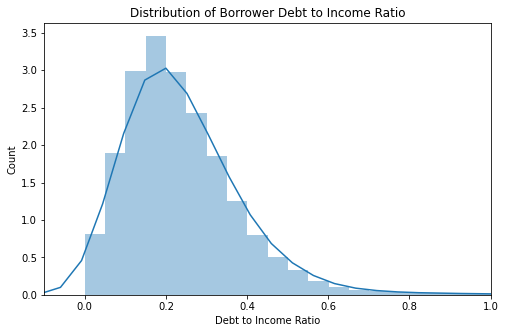

In [37]:
plt.figure(figsize = [8,5])
sb.distplot(df.DebtToIncomeRatio, kde = True, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

From the Borrower Debt to income ratio plot, we notice that the data is right skewed, which is the same as that of estimared return. This gives an intresting relationship between estimated return and debt-to-income ratio meaning that all borrowers were given returns with an intrest rate that they can pay back on. So it's all fair and there will not be unnecssary chargeoff's account. All chargedoff's and defaulted loan status arise as a result of failure in the borrower part to pay back, not on the company's part.

This helps us to create questions on why people do not pay their loans back, after ruling out the company's fault. This might be due to other reasons. Probably an analysis for other day.

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Our variables of intrest included Loan status, Lender yield, Estimated effective yield, Estimated Loss, Estimated return, Prosper rating(Numeric), Prosper rating(Alpha), Prosper score income, debt to income ratios, credit ratings, estimated returns and actual returns for the data set.

Although we just analyzed the loan status, Estimated return, Debt-to-income ratios, Actual returns and income range in no particular order.

Most of the distributions were a bit skewed, the estimated returns, the debt-to-income ratio and certain aspects of the loan status, especially those that defaulted, this I thought should probably be due to the income range, but the income range was normally distributed. So i felt there might have been an error in how Prosper calculated the estimated return that's not valid across all income groups, or probably it might have been related to the borrowers themselves.

Certain transformations were carried out on the Income range data, such as replacing the data and changing the variables to categorical ordinal data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To tidy up our visualizations, we combined several rows for different visuals where the categories appeared to be redundant.  Such as the income ranges of "Not employed" and "Not displayed" are essentially equivalent to "\\$0". We also had to remove many null data from the Estimated returns section so as to analyze our graphs so well.

# Bivariate Analysis (I)

# Numeric vs Categorical Variable.

In [39]:
numeric_vars = ['DebtToIncomeRatio', 'ActualReturns', 'EstimatedReturn']
categoric_vars = ['IncomeRange', 'ProsperRating (Alpha)','Loan status']

Text(0, 0.5, 'Estimated Return')

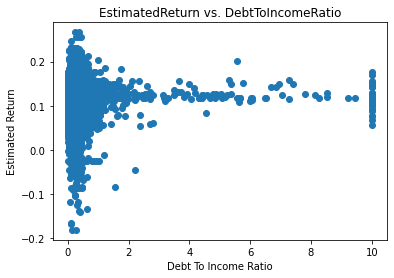

In [40]:
plt.scatter(df.DebtToIncomeRatio, df.EstimatedReturn)
plt.title('EstimatedReturn vs. DebtToIncomeRatio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Estimated Return')
           

No form of correlation and relationship between Estimated Return and Debt to Income Ratio.
Further Analysis and Interpretation done ahead.

Text(0, 0.5, 'ActualReturns')

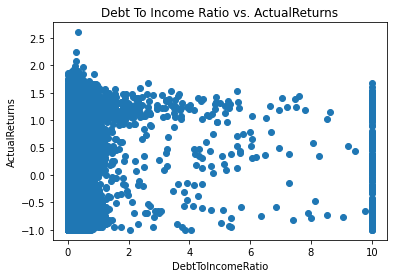

In [41]:
plt.scatter(df.DebtToIncomeRatio, df.ActualReturns)
plt.title('Debt To Income Ratio vs. ActualReturns')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('ActualReturns')

No form of correlation between Debt to Income ratio and Actual returns.

Text(0, 0.5, 'ActualReturns')

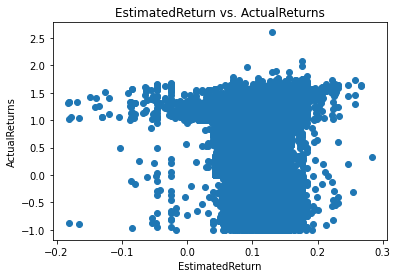

In [51]:
plt.scatter(df.EstimatedReturn, df.ActualReturns)
plt.title('EstimatedReturn vs. ActualReturns')
plt.xlabel('EstimatedReturn')
plt.ylabel('ActualReturns')

No form of relationshis between Estimated Returns and Actual Returns.

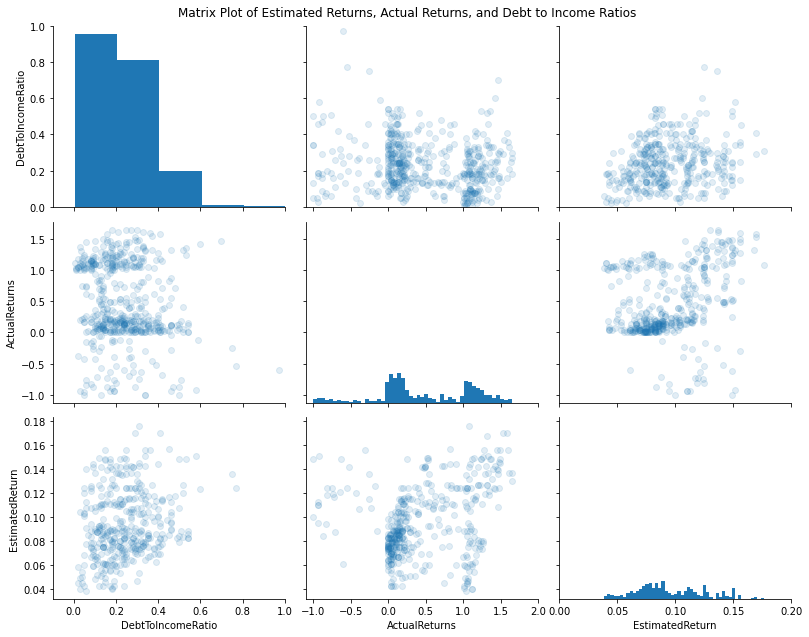

In [43]:
samples = np.random.choice(df.shape[0], int(df.shape[0]*.005), replace = False)
df_samp = df.loc[samples,:]

# pair grid
g = sb.PairGrid(data = df_samp, vars = numeric_vars, size = 3, aspect = 1.25)
g = g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter, alpha = 1/8)

# set axis limits
g.axes[0,0].set_ylim(0,1)
g.axes[0,0].set_xlim(-.1,1)
g.axes[0,1].set_xlim(-1.1,2)
g.axes[0,2].set_xlim(0,.2)

g.fig.suptitle('Matrix Plot of Estimated Returns, Actual Returns, and Debt to Income Ratios')
g.fig.subplots_adjust(top = .95);

 A scatter plot was also conducted using seaborne, this further validated that there is no relationships between matrix plots of estimated returns, actual returns and Debt-to-Income ratio. Explicit explanations were given below.

# Bivariate Analysis(ii)

## Income Range and Prosper Credit Rating with Estimated Return

Income Range with Estimated Return.

Text(0, 0.5, 'IncomeRange')

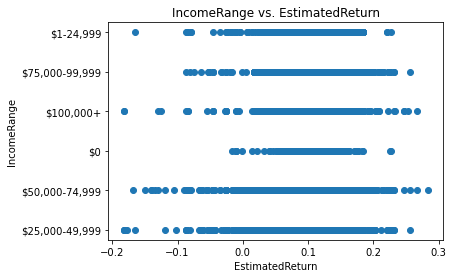

In [44]:
plt.scatter(df.EstimatedReturn, df.IncomeRange)
plt.title('IncomeRange vs. EstimatedReturn')
plt.xlabel('EstimatedReturn')
plt.ylabel('IncomeRange')

As we can see, there is a direct relationship between Income range and Estimated return. Meaning the estimated return increases in response to the income range of the borrowers. Indicating that those borrowers with a higher amount of income also had a higher amount of estimated return.

This graph is not clear enough, so we would create box plots for further clearer visualization.

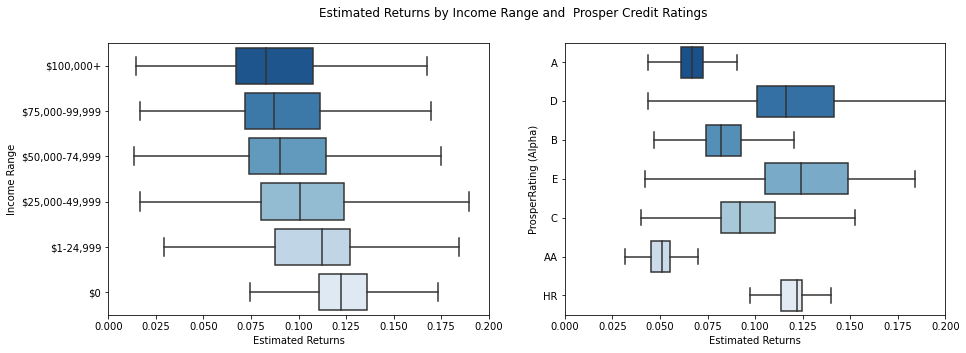

In [45]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'IncomeRange', x = 'EstimatedReturn', palette = "Blues_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Income Range')
plt.xlabel('Estimated Returns')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'ProsperRating (Alpha)', x = 'EstimatedReturn', palette = "Blues_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('ProsperRating (Alpha)')
plt.xlabel('Estimated Returns')

plt.suptitle('Estimated Returns by Income Range and  Prosper Credit Ratings');

Also the boxplots shows an intresting analysis, of Estimated returns with Income range. we're able to clearly see that as the borrowers income increases, the median estimated return decreases. The credit rating boxplot shows the trend more clearly, as a borrowers credit rating increases, the median estimated return greatly decreases.

We can speculate the reasoning that as income increases, the ability to repay the loan also increases, so to adjust for the higher risk, the interest rate for the loan also increases.

Also, creditors typically compete for these high income borrowers which drive the highest credit rating interest rates down.

# Bivariate Analysis(iii)

## Income Range and Prosper Credit Rating(Alpha) with Actual Returns.

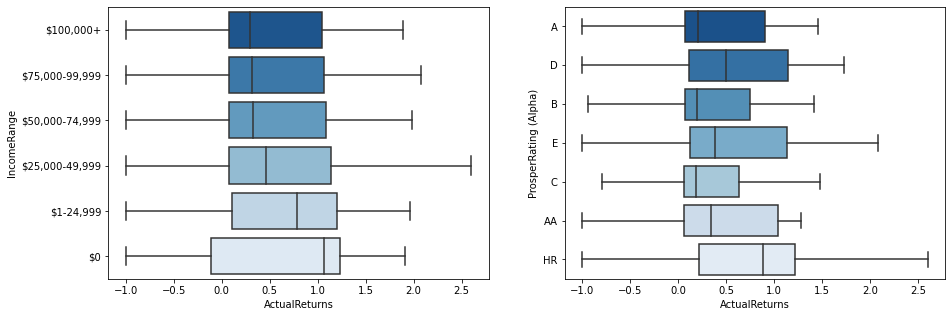

In [46]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'IncomeRange', x = 'ActualReturns', palette = "Blues_r", showfliers = False)

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'ProsperRating (Alpha)', x = 'ActualReturns', palette = "Blues_r", showfliers = False);

This plots looks intresting.. Simply because the borrowers with no income range, seems to have the highest actual returns. How is this so?
Well it might be due to a whole lot of factors that we don't know about. Also we could see that those with the highest actual rating are those who have the highest actual returns.

# Bivariate Analysis of Income Range and Prosper Rating (Alpha)

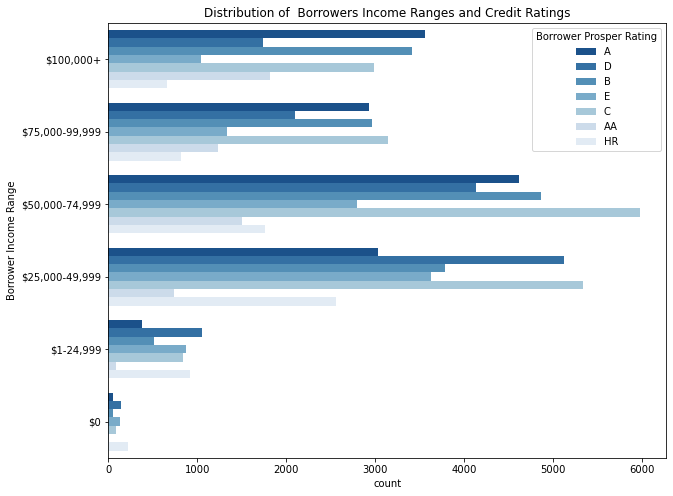

In [47]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = df, y = 'IncomeRange', hue = 'ProsperRating (Alpha)',
                   palette = 'Blues_r')

ax.legend(title = 'Borrower Prosper Rating')
plt.title('Distribution of  Borrowers Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

According to logical deduction, we can say that  High Prosper credit ratings are not only allocated to those with High income range, Meaning income ranges are not only what are used for the determination of ratings.

According to (https://www.fool.com/the-ascent/personal-loans/articles/7-factors-lenders-look-considering-your-loan-application/)
the other factors that determine credit ratings includes Loan and employment history such as Loan performance, whcih was included in the data frame, but we did not calculate that. Liquid assets, Value of your collateral, Loan term, size of down payments and finally Debt-to- Income ratio. Unfortunately we did analysis using the Debt-to-Income ratio and we figured out that there was not any relationships of any sort between D-T-I Ratio,Estimated Returns and Actual Returns. Since D-T-I Ratio is linked to monthly income and dues, there can be unneccesary fluntuation in the D-T-I Ratio and prosper considered it not  the best option.

N.B These are just my point of view (Analysis can be done further to determine whether the Debt-To-Income Ranges has anything to do with Income Ranges), so we can determine if Prosper really takes the Debt-to-Income Ratio into consideration. 

Although according to Prosper (https://help.prosper.com/hc/en-us/articles/210013963-What-are-the-minimum-criteria-to-borrow-on-Prosper-) their maximum Debt-to-Income ratio is 50%.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It has been an interesting Analysis so far, some Hypothetical assumptions were validated and others were refuted as I got ahead with my analysis
The Debt-To-Income Ratio which is a vital requirement for every loan lending company, was not related to other variables, I thought it would be related to such as the Actual
Returns and the Estimated Returns.

According to (https://www.thepeoplehistory.com/2009.html), there was  an ongoing financial crisis and recession which began in late 2007 continues with many calling it the worst financial crisis since the Great Depression of the 1930s causing house prices to decline, and unemployment to increase. In 2009 governments in the US and around the world pumped trillions of dollars into the financial system and into the economies hoping to avert another Great Depression and by the end of 2009 although unemployment had continued to increase, markets had recovered and most thought the worst was over.

From the Information above, we might deduce that this was the major reason why the D/I Ratio was not related to the returns those year, Probably it was not used in 2009.

Also, there was a positive relationship between the Income ranges and the Actual return values, coupled with the Prosper ratings. This made so much sense becuase those with a higher level of income, would pay loan quickly which increase their ratings and since there are a whole lot of other loan companies, the estimated return is going to be reduced for those with high income range, so as to increase the rate of High-risk borrowerrs.

The features of intrest, did not vary much with other features in the data set, there were other important features in the data set, but the features used for investigation actually could gives us insights into what was really happening at prosper during 2009.

Yeah, I observed very interesting relationsips between other features such as Loan performance and Income ranges of borrowers and Loan performance with the credit socre rating and the debt-to-income ratio. I suspect that the relationships between all these variables would be positive.

# Multivariate Exploration.

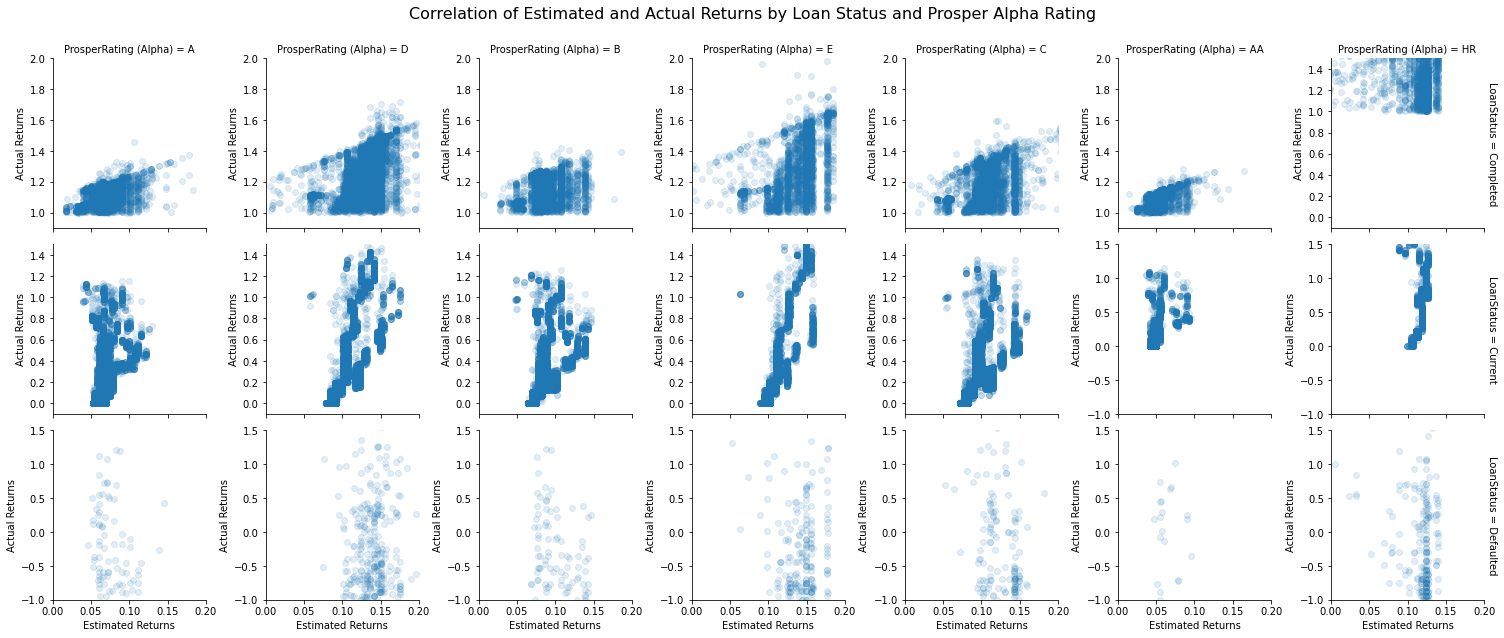

In [48]:
# create scatter plot across credit ratings and loan status
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', row_order = ['Completed', 'Current', 'Defaulted'], 
                  row = 'LoanStatus', margin_titles = True, xlim = (0,.2), sharey = False)
g.map(plt.scatter, 'EstimatedReturn', 'ActualReturns', alpha = 1/8)

# set different y axes for different loan statuses
for i, ax in enumerate(g.axes.flat):
    if i < 6:
        ax.set_ylim(.9, 2)
    elif i < 12:
        ax.set_ylim(-.1, 1.5)
    else:
        ax.set_ylim(-1, 1.5)
        
g.set(xlabel = 'Estimated Returns', ylabel = 'Actual Returns')

g.fig.suptitle('Correlation of Estimated and Actual Returns by Loan Status and Prosper Alpha Rating', size = 16)
g.fig.subplots_adjust(top = .9);

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? Were there any interesting or surprising interactions between features?

In this investigation, what i noticed was that both the completed and current loan resulted in a higher actual and estimated returns, whcih obviously would. But the defaulted loan did not. There were no suprising interaction. The plot just further confirmed my hypothetical assumption previously.

# References

1.  https://www.fool.com/the-ascent/personal-loans/articles/7-factors-lenders-look-considering-your-loan-application/

2.  https://help.prosper.com/hc/en-us/articles/210013963-What-are-the-minimum-criteria-to-borrow-on-Prosper-

3. https://www.thepeoplehistory.com/2009.html

4. https://www.grin.com/document/962972